In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

import os

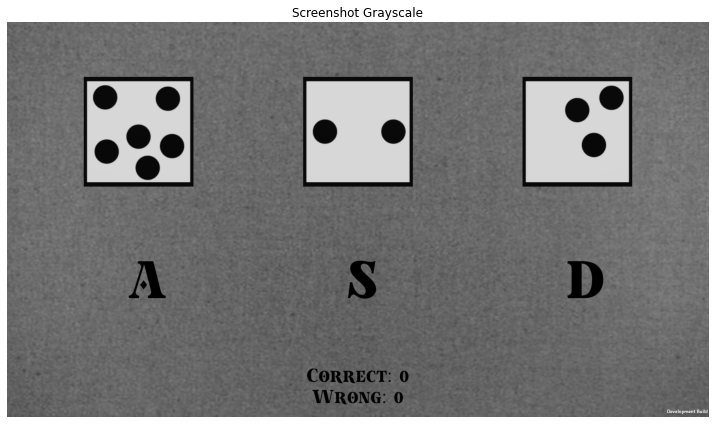

In [2]:
img_path = "screenshots/part1.png"
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12, 6))
axes.imshow(img, cmap="gray")
axes.set_title("Screenshot Grayscale")
axes.axis("off")
plt.tight_layout()
plt.show()

In [3]:
def auto_canny(img, sigma=0.33):
	# compute the median of the single channel pixel intensities
	v = np.median(img)
	# apply automatic Canny edge detection using the computed median
	lower = int(max(0, (1.0 - sigma) * v))
	upper = int(min(255, (1.0 + sigma) * v))
	edged = cv2.Canny(img, lower, upper)
	# return the edged image
	return edged

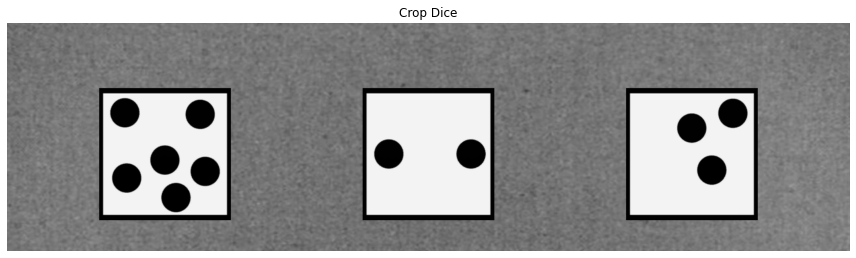

In [4]:
dice_top_left = (0, 0)    # w, h
dice_bot_right = (1920, 520)    # 1920 = 1 * width, 520 = 0.48 * height

dice = img[dice_top_left[1]:dice_bot_right[1], dice_top_left[0]:dice_bot_right[0]]

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12, 6))
axes.imshow(dice, cmap="gray")
axes.set_title("Crop Dice")
axes.axis("off")
plt.tight_layout()
plt.show()

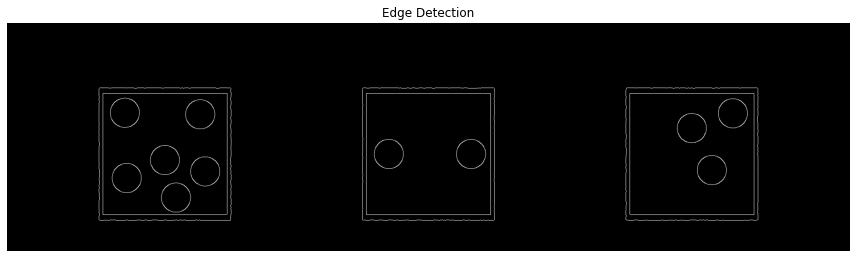

In [5]:
edged = auto_canny(dice)

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12, 6))
axes.imshow(edged, cmap="gray")
axes.set_title("Edge Detection")
axes.axis("off")
plt.tight_layout()
plt.show()

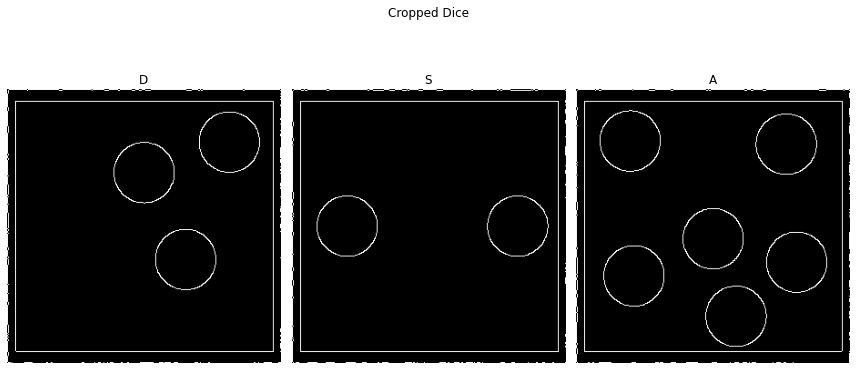

In [6]:
contours, hierarchy = cv2.findContours(edged, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

cropped_die = []
for contour in contours:
    die_top_left = contour.min(axis=0)[0]
    die_bot_right = contour.max(axis=0)[0]
    cropped_die.append(edged[die_top_left[1]:die_bot_right[1], die_top_left[0]:die_bot_right[0]])
    
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 6))
[axis.imshow(cropped_die[idx], cmap="gray") for idx, axis in enumerate(axes)]
[axis.axis("off") for axis in axes]
[axes[idx].set_title(title) for idx, title in enumerate(reversed(["A", "S", "D"]))]
fig.suptitle("Cropped Dice")
plt.tight_layout()
plt.show()

In [31]:
def number_of_circles(img):
    circle = cv2.HoughCircles(img, cv2.HOUGH_GRADIENT, dp=1, minDist=10, param1=100, param2=45, minRadius=0, maxRadius=0)
    return len(circle[0])
die_D = number_of_circles(cropped_die[2])
print(die_D)

6


In [8]:
die_D = number_of_circles(cropped_die[0])
die_S = number_of_circles(cropped_die[1])
die_A = number_of_circles(cropped_die[2])

if die_A > die_S and die_A > die_D:
    print("Press A")
elif die_S > die_D:
    print("Press S")
else:
    print("Press D")

TypeError: '>' not supported between instances of 'NoneType' and 'NoneType'